<a href="https://colab.research.google.com/github/CarolinaFassi/DIPLOMATURA/blob/main/Intro_ML_Entegable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston['DESCR'])   # descripción del dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1.  El conjunto de datos contiene información recolectada por el USCS en 1970 concerniente principalmente a la calidad de vivienda y del ambiente en el area de Boston y su relacion con el precio de la propiedad. Se publicó originalmente por Harrison, D. y Rubinfeld, D.L. en el paper 'Hedonic  prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. 
Consta de 506 registros con 13 atributos cada uno, tanto categoricos como numéricos que corresponden a características de la propiedad y una última columna asociada al valor de la misma. 

2. La variable objetivo es MEDV, esta representa el valor de la mediana de precios de una vivienda ocupada por sus propietarios expresado en miles de dolares. 

3. 
        - CRIM     Indice de crimen por habitante, segun la zona.
        - ZN       proporción de suelo residencial loteado en parcelas de más de 25,000 pies cuadrados, las restricciones a la construccion de casas pequeñas puede tener un efecto positivo en el valor de propiedad ya que garantiza cierta exclusividad.
        - INDUS    proporción de hectareas comerciales no minoristas por ciudad, introduce las externalidades asociadas a la industria media y pesada, ruidos, contaminación, paisaje.
        - CHAS     Variable con dos resultados posibles 1 si el lote es lindero al rio y 0 en caso contrario. 
        - NOX      Concentración de Oxidos de Nitrogeno en pp10m. Los óxidos de nitrógeno se forman cuando se quema combustible (automóviles, centrales eléctricas y otras fuentes industriales)
        - RM       Promedio de habitaciones por vivienda.
        - AGE      Propocion de viviendas ocupadas por sus dueños cuya construcción es previa a 1940.
        - DIS      Distancias ponderadas a cinco centros de empleo de Boston.
        - RAD      Indice de accesibilidad a circunvalaciones.
        - TAX      Impuesto a pagar por la propiedad cada 10000 dolares.
        - PTRATIO  Proporcion de alumnos por maestro.
        - B        1000(Bk - 0.63)^2 donde Bk es la proporcion de negros por ciudad.
        - LSTAT    % de la poblacion que pertenece a clase baja (sin educacion media y obreros).
        - MEDV     Valor de la mediana de precios de una vivienda ocupada por sus propietarios expresado en miles de dolares.

4. CRIM, INDUS, CHAS, RM, DIS, LSTAT.

5. A nuestro criterio el conjunto de datos tiene varios problemas. A priori, los datos recolectados son antiguos y estan sin dudas signados por el pensamiento y la sociedad de la epoca. 
Seguramente las variables en las que se concentraron los investigadores en ese momento no sean las mismas que preocuparian a las familias en el futuro, por este motivo consideramos que este conjunto de datos puede haber sido util para predecir precios a corto plazo, pero el sesgo de la epoca hace que muchas variables no sean utiles en el largo plazo. 
Un ejemplo de esta situacion es la inclusion de  una variable B, la cual se calcula en base a la proporcion racial.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

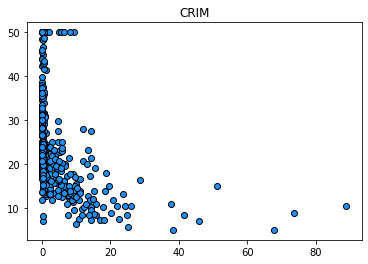

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [ ]:
bdf=pd.DataFrame(boston.data, columns=boston['feature_names'])
bdf['MEDV']=boston.target
bdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
bdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


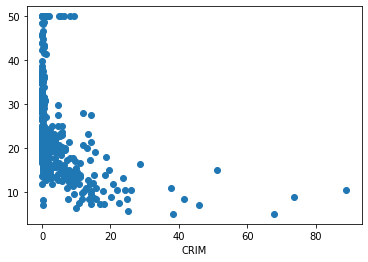

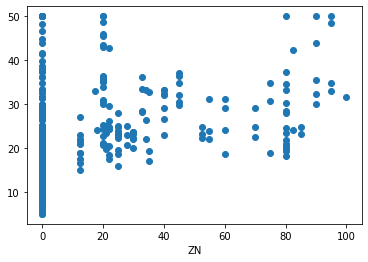

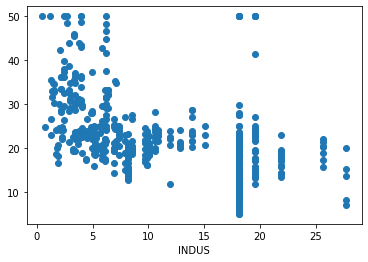

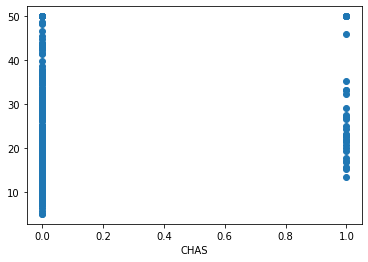

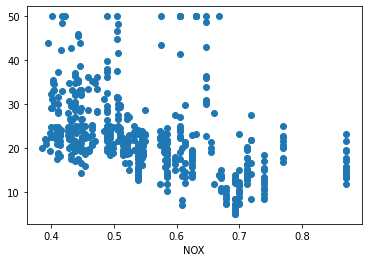

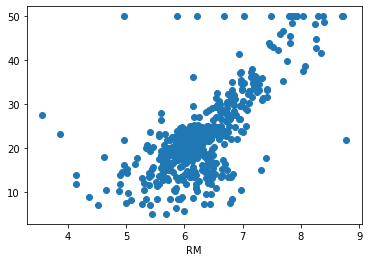

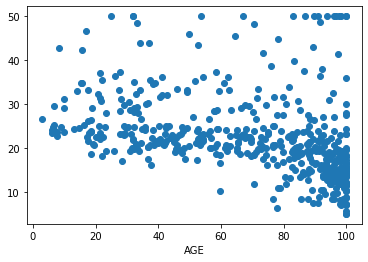

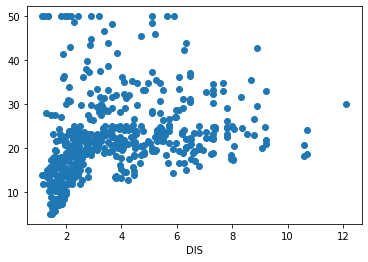

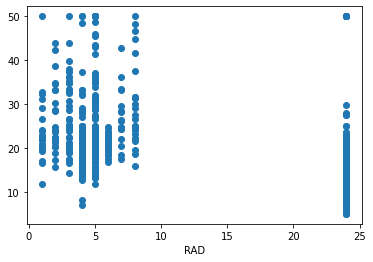

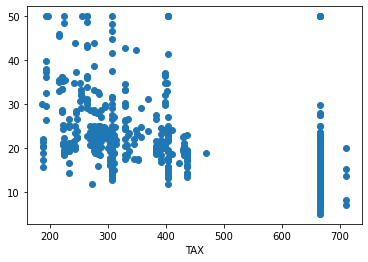

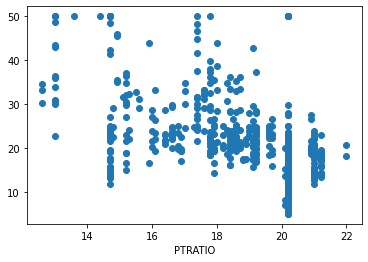

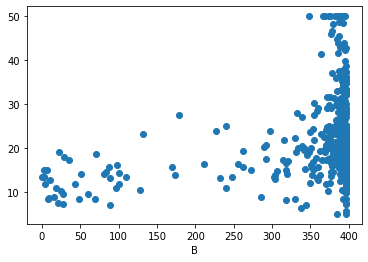

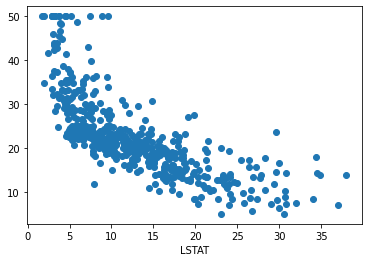

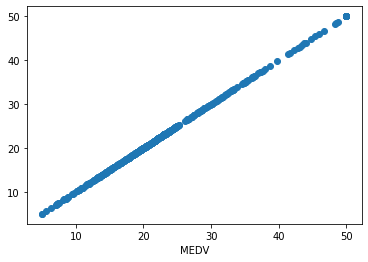

In [ ]:
variables=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
for var in variables:
  x=bdf[var]
  y=bdf['MEDV']

  fig,ax=plt.subplots()
  ax.scatter(x,y)
  ax.set_xlabel(var)

2. CRIM, PTRATIO, LSTAT, INDUS, RM, NOX

3.

1 - CRIM

2 - PTRATIO

3 - LSTAT

4 - INDUS

5 - RM 

6 - NOX

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape



((404, 1), (102, 1))

In [ ]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
X_train_f=X_train_f.flatten()
X_test_f=X_test_f.flatten()
X_train_bias=np.stack((np.ones(X_train_f.shape[0]), X_train_f), axis=1)
X_train_bias.shape


(404, 2)

In [ ]:
# 2. Instanciar y entrenar acá.
w = linear_least_squares(X_train_f, y_train)
w

array([-0.95648761, 34.76519272])

In [ ]:
# 3. Predecir y evaluar acá.
y_train_pred = f(X_train_f, w)
y_val_pred = f(X_test_f, w)

In [ ]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(X_test_f, y_val_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 36.523966
Val error: 269.092778


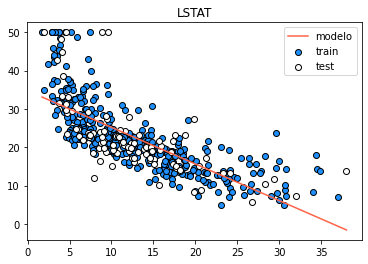

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x.flatten(), f(x.flatten(),w), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

5. Que el modelo sea solo de grado 1 resulta en una limitante para el ajuste a los datos, por ese motivo el error cuadratico medio es significativo. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

X_val_f = X_test_f.flatten()
X_train_f=X_train_f.flatten()
X_test_f=X_test_f.flatten()

X_train_f = X_train_f.reshape(-1, 1)
X_val_f = X_val_f.reshape(-1, 1)


In [ ]:
# Instanciar y entranar
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

d = [0,1,2,3,4,5,6,7,8,9,10]
terror=[]
verror=[]
for d in d: 
    pf = PolynomialFeatures(d)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)

    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_val_f)

    train_error = mean_squared_error(y_train, y_train_pred)
    terror.append(train_error)
    val_error = mean_squared_error(y_test, y_val_pred)
    verror.append(val_error)
    print('-----------------------')
    print('Grado de polinomio: ', d)
    print(f'Train error: {train_error:0.4}')
    print(f'Test error: {val_error:0.4}')

-----------------------
Grado de polinomio:  0
Train error: 85.14
Test error: 81.58
-----------------------
Grado de polinomio:  1
Train error: 36.52
Test error: 46.34
-----------------------
Grado de polinomio:  2
Train error: 28.19
Test error: 38.85
-----------------------
Grado de polinomio:  3
Train error: 26.78
Test error: 37.22
-----------------------
Grado de polinomio:  4
Train error: 25.85
Test error: 34.7
-----------------------
Grado de polinomio:  5
Train error: 25.03
Test error: 34.83
-----------------------
Grado de polinomio:  6
Train error: 25.01
Test error: 34.33
-----------------------
Grado de polinomio:  7
Train error: 25.01
Test error: 34.26
-----------------------
Grado de polinomio:  8
Train error: 24.85
Test error: 36.42
-----------------------
Grado de polinomio:  9
Train error: 24.83
Test error: 34.92
-----------------------
Grado de polinomio:  10
Train error: 30.35
Test error: 61.43


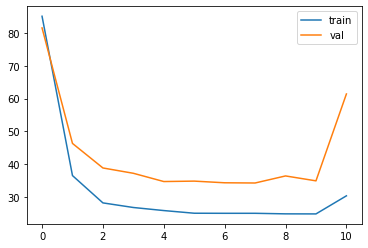

In [ ]:
# 2. Graficar curvas de error acá.
plt.plot(terror, label='train')
plt.plot(verror, label='val')

plt.legend()

3. A partir de grado 8 comienza a haber sobreajuste.

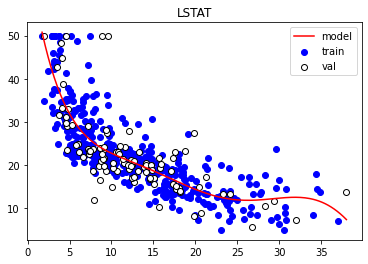

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
degree = 7
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train);
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")

plt.legend()
plt.title(feature)
plt.show()
plt.show()

5. Dado que se puede utilizar un polinomio de grado mayor a uno se pueden realizar mejores predicciones debido a la naturaleza de los datos.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'PTRATIO') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape, y_train.shape, y_test.shape

((404, 3), (102, 3), (404,), (102,))

In [ ]:
# 2. Resolver acá.

reg=LinearRegression().fit(X_train_fs, y_train)

y_train_pred=reg.predict(X_train_fs)
y_val_pred=reg.predict(X_test_fs)

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_val_pred)
r=reg.score(X_train_fs, y_train) # R^2 mejor valor 1 
print(train_error)
print(val_error)
print(r)

28.78201027362265
51.624628926328405
0.6619596818406794


## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
